In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set_context("notebook", font_scale=1.5)
sns.set_palette("tab10")

# Into

By its nature, statistical tests give an answer to questions like:
- *What is the probability of the observed difference be due to pure chance? (Q1)*

For an actionalbe insight, a yes/no question is often preffered. In abstract terms, we seek to answer another question: <br>
- *Based on the observations, can we reject the null hypothesis $H_0$? (Q2)*

where the **null hypothesis** $H_0$ refers to a statement that the treatment has no effect on the outcome. In terms of the business problem, the above question can sound something like <br>
- *Does the new website design improve the subscription rate by at least 1.5 %?*

In this case, $H_0$ will be the statement that *the new website design does not improve the subscription rate by at least 1.5 %*

Before jumping into experiments, couple things need to be done. To reconsile two questions and avoid bias in interpreting result, [two things](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) have to be set prior to carrying out the experiment. 

<table>
    <thead>
        <tr>
            <th colspan=2> </th>
            <th colspan=2 style="text-align:center"> Null Hypothesis Actually is </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td></td>
            <th style="text-align:center">Decision</th>
            <th style="text-align:center">True</th>
            <th style="text-align:center">False</th>
        </tr>
        <tr>
            <th rowspan=2 style="text-align:center">Decision<br>about<br>Null Hypothesis</th>
            <th>Don't<br>Reject</th>
            <td style="text-align:center">Correct Decision <br>(true positive)<br> probability = $1 - \alpha$</td>
            <td style="text-align:center">Type 2 Error <br>(false negative)<br> probability = $\beta$</td>
        </tr>
        <tr>
            <th>Reject</th>
            <td style="text-align:center">Type 1 Error <br>(false positive)<br> probability = $\alpha$</td>
            <td style="text-align:center">Correct Decision <br>(True negative)<br> probability = $1 - \beta$</td>
        </tr>
    </tbody>
</table>

The first one is the probability threshold $\alpha$, also known as **sensitivity**. Lets assume that $H_0$ was actually correct, treatment made no difference. If the estimated probability from *Q1* is at or below $\alpha$, we incorrectly reject null hypothesis and conclude that the treatment made a difference. In particular, there is a less than $\alpha$ chance that the observed effect was purely due to random chance, which is reffered to as the type 1 Error. The latter means that we are willing to tollerate the potentially incorrect decision to reject $H_0$ if the probability of such a scenario is no more than $\alpha$.

The second one probability threshold $\beta$ considers the scenario when $H_0$ is actually incorrect, but the experiment indicates that it is correct. The complementary probability, $1 - \beta$, is referred to as statistical **power** and describes a degree of certainty we want to have in been correct if we decide to reject $H_0$. In other words, statistical power gives us an expected fraction of correctly rejecting incorrect null hypothesis if we run many such experiments.

# Example problem to test

The objective is to quantify the effect of treatment on the probability of a certain outcome. A classic example is whenever a new website interface improves the sales at or above certain threshold. Or what is the effect of medication on the probability of a patient developing a severe form of the disease.

> "Does the new website design improve the subscription rate by at least 1.5 %?"

As an example, we seek to answer the above question. In the simplest case, we assume that
- For the experiment, customers are selected at random from a cohort that represents the target audience
- Customers make decisions independent of each other
- Customer traffic is split into two groups, **A** and **B**, depending on which version the website, new or old, they were presented with

Under these assumptions, the probability distribution for a number of subscriptions in each group is given by the binomial distribution with probabilities of a customer subscribing are $p_A$ and $p_B$ respectively. In addition, lets assume that for the old version of the website there is a good estimate for the value of subscription probability $p_A$, which is $8.5\%$. From this point, we can use 5 steps [100 Statistical Test](https://www.amazon.com/Statistical-Tests-Third-Gopal-Kanji/dp/141292376X) as a guide to setup the experiment

**Step 1: Null Hypothesis**
> The null hypothesis states that $p_B - p_A < 0.015$, so that the new website design has less than the desired effect on the subscription probability.

In the language of mathematics, the null hypothesis $H_0$ states that $\mu =  p_B - p_A = 0.015$.

**Step 2: Sensitivity and Power**

Next, we need to select values of sensitivity and power that we are comfortable with. Usually, $\alpha$ for sensitivity is selected to be between 1 and 10 percent, while for power $1 - \beta$ is of the order of at least 80 percent. For this example lets set

> $$\alpha = 0.05$$ $$1 - \beta = 0.8$$

These values come from classical literature and aim to strike a balance between detecting the effect of treatment if it is present, while reducing the cost of collecting the data. For more detailed discussion check out p. 17 in [Statistical Power Analysis
for the Behavioral Sciences](http://www.utstat.toronto.edu/~brunner/oldclass/378f16/readings/CohenPower.pdf) and p. 54, 55 in [The Essential Guide to Effect Sizes](https://www.cambridge.org/core/books/essential-guide-to-effect-sizes/72C26CA99366A19CAC4EF5B16AE3297F).

**Step 3: Test statistic**

If the number of customers $N_A$ and $N_B$ is sufficiently large, we can invoke [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) to describe the probability distributions of the subscription number means in each group
$$\overline x_A \sim N(p_A, \sigma_A)$$
$$\overline x_B \sim N(p_B, \sigma_B)$$

where $N(\mu, \sigma)$ is a normal distribution. For the test statistic $Z$, we can use the rule for a [sum of normally distributed random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables)

> $$Z = \frac{\overline x_B - \overline x_A - \mu}{(\sigma_A + \sigma_B)^{1/2}} \sim N(0, 1)$$

If the [p-value](https://en.wikipedia.org/wiki/P-value) for the test statistic is at or below $\alpha = 0.05$, we must reject $H_0$ and accept an alternative hypothesis $H_1$ that version **B** of the website does improve the subscription rate by $1.5 \%$ or more than the current version **A**.

**Step 4: Confidence Interval for test statistic**

Based on test statistic $Z$ and sensitivity $\alpha$, select critical region. It is evident from the null hypothesis that we need to use a one-tail region only. Since $Z$ is described by a normal probability distribution function (pdf), the value critical is $Z_c \approx 1.64$. The corresponding cumulative distribution function for this critical value $Z_c$ covers $100\times(1 - \alpha) = 95 \%$ interval. Should the value of test statistic fall inside the interval $(-\infty, Z_c)$, we accept null hypothesis, otherwise we accept an alternative hypothesis.

**Step 5: Effect Size and Sample Size**

Finally, lets estimate a minimal sample size required to achieve desired statistical power. In addition to sensitivity and power, [effect size](https://en.wikipedia.org/wiki/Effect_size) needs to be evaluated, which requires *a priori* information and / or assumptions. For equal number customers in both groups with the assumption that this number is sufficiently large (so that the sampling distribution is well approximated a normal one), Cohen's *D* can be used to approximate effect size

$$D = \frac{|p_B - p_A|}{\sigma}$$

where $\sigma^2 = s_A^2 + s_B^2$ and $s_{A(B)} = \sqrt{p_{A(B)}(1 - p_{A(B)})}$. With the value of subscription rate of $8.5\%$ from the old website and an additional $1.5\%$ from the new website, we obtain

In [3]:
p_A = 0.085
p_B = 0.11

s_A = np.sqrt(p_A * (1 - p_A))
s_B = np.sqrt(p_B * (1 - p_B))
S = np.sqrt(s_A**2 + s_B**2)
VALUE = 0.015 # improvement value


D = np.abs(p_B - p_A - VALUE)/S
D

0.023858603450082772

With all pieces of the puzzle in place, we can proceed to estimating the sample size the above effect size, sensitivity and power. Pythons ```statsmodel``` package comes handy for this task

In [4]:
from statsmodels.stats.power import NormalIndPower

ALPHA = 0.05
BETA = 0.2

PowerAnalysis = NormalIndPower()

N_total = PowerAnalysis.solve_power(effect_size=D, alpha=ALPHA, power=1 - BETA, alternative="larger", ratio=1)
N_total

21722.41483512319

Under the hood, this involves numerically solving this [equation](https://en.wikipedia.org/wiki/Power_of_a_test) for $N_{A(B)}$

$$\beta = \Phi(Z_c - D\times\sqrt{N_{A(B)}})$$

where function $\Phi$ is a probit function, an inverse of cumulative distribution function (CDF) for the normal didistribution. With power $1 - \beta = 0.8$ we can verify this by substituting the result into a CDF for the normal distribution, which should be equal to $\beta = 0.2$.

In [5]:
from scipy.stats import norm

Zc = 1.64

norm.cdf(Zc - D*np.sqrt(N_total/2))

0.19864394616897701

# Experiments
> With everything set up, lets consider three cases for how the real magnitude of the subscription rate in group **B** compares to the estimated one

In [6]:
from statsmodels.stats.weightstats import ztest

In [7]:
# Get number of samples in each group
N = np.ceil(N_total/2).astype(int)

print(f"Groups A and B have {N} samples each")

Groups A and B have 10862 samples each


In [8]:
# Setup the dummy data generation and run test
def run_ztest(p0, p1, N_samples, value):
    # generate data
    data_0 = np.random.binomial(1, p0, N_samples)
    data_1 = np.random.binomial(1, p1, N_samples)
    
    # run Z-test
    result = ztest(data_1, data_0, alternative="larger", value=value)
    
    return result

## Under the hood

In [9]:
# example data
data_A = np.random.binomial(1, p_A, N)
data_B = np.random.binomial(1, p_B, N)

In [10]:
# Calculate test statistic
Z = (np.mean(data_B) - np.mean(data_A) - 0.015) / np.sqrt(np.std(data_A)**2 / len(data_A) + np.std(data_B)**2 / len(data_B))
Z

2.0078846168308067

In [11]:
# Run out of the box Z-test. First value is test statistic (Z), second is P-value
ztest(data_B, data_A, alternative="larger", value=0.015)

(2.007792187681825, 0.02233268968203282)

## Estimate for $p_B$ was spot on
> $p_{true}$ = $p_B$

In [12]:
# Perfectly estimated value for version B subscription rate improvement
p_true = 0.11

In [13]:
np.random.seed(42)

Zvalues = []
Pvalues = []

for _ in range(1000):
    Z, p = run_ztest(p0=p_A, p1=p_true, N_samples=N, value=0.015)
    
    Zvalues.append(Z)
    Pvalues.append(p)

In [14]:
correct_decision_percentage = np.mean(np.array(Pvalues) < ALPHA)
correct_decision_percentage =  np.round(100 * correct_decision_percentage, 1)
print(f"Based on the test setup, the chance of making correct decision is {correct_decision_percentage}%")

Based on the test setup, the chance of making correct decision is 77.9%


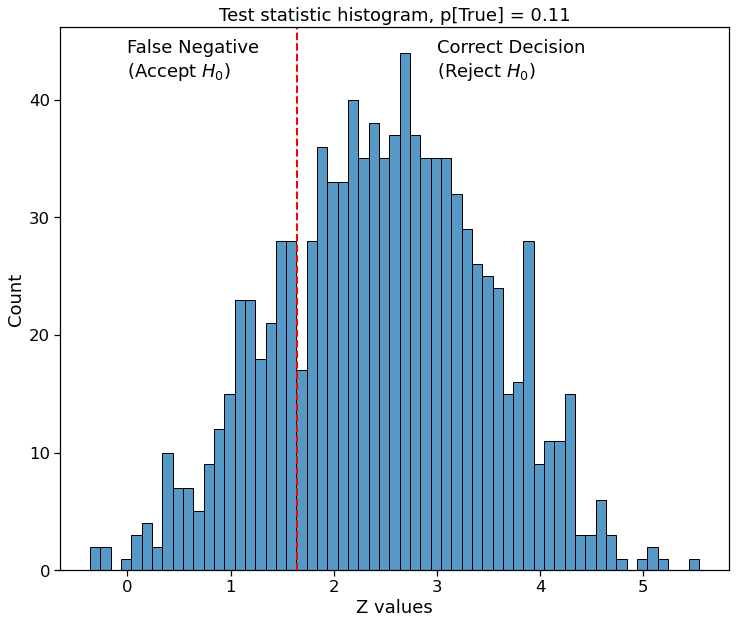

In [15]:
fig = plt.figure(figsize=(12, 10))

sns.histplot(
    data=pd.DataFrame(data=Zvalues, columns=["Z values"]), 
    x="Z values", 
    binwidth=0.1
)

plt.axvline(Zc, c="red", ls="--", lw=2)
plt.text(0, 42, "False Negative\n(Accept $H_0$)")
plt.text(3, 42, "Correct Decision\n(Reject $H_0$)")
plt.title(f"Test statistic histogram, p[True] = {p_true}");

Good estimate for $p_B$ allows to accurately estimate the effect size, the number of samples required to achive the target statistic power of $80\%$. Running 1000 identical tests, correct decision will be made in $77.9\%$.

## Estimate for $p_B$ was too optimistic
> $p_{true}$ < $p_B$

In [16]:
# True value for version B is less than the estimated value - 10.5%, but still better than 1.5% improvement
p_true = 0.105

In [17]:
np.random.seed(42)

Zvalues = []
Pvalues = []

for _ in range(1000):
    Z, p = run_ztest(p0=p_A, p1=p_true, N_samples=N, value=0.015)
    
    Zvalues.append(Z)
    Pvalues.append(p)

In [18]:
correct_decision_percentage = np.mean(np.array(Pvalues) < ALPHA)
correct_decision_percentage = np.round(100 * correct_decision_percentage, 1)
print(f"Based on the test setup, the chance of making correct decision is {correct_decision_percentage}%")

Based on the test setup, the chance of making correct decision is 35.8%


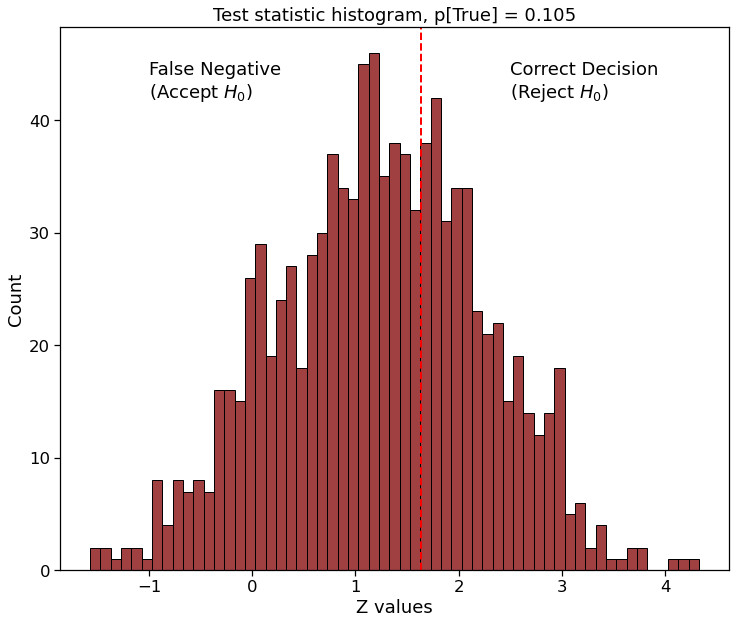

In [19]:
fig = plt.figure(figsize=(12, 10))

sns.histplot(
    data=pd.DataFrame(data=Zvalues, columns=["Z values"]), 
    x="Z values", 
    color="maroon",
    binwidth=0.1
)

plt.axvline(Zc, c="red", ls="--", lw=2)
plt.text(-1, 42, "False Negative\n(Accept $H_0$)")
plt.text(2.5, 42, "Correct Decision\n(Reject $H_0$)")
plt.title(f"Test statistic histogram, p[True] = {p_true}");

Estimate for $p_B$ was too optimistic, resulting in overly high effect size. Running 1000 identical tests, correct decision will be made in $35.8\%$.

## Estimate for $p_B$ was too pessimistic
> $p_{true}$ > $p_B$

In [20]:
# True value for version B exceeds the estimated value - 11.3%
p_true = 0.113

In [21]:
np.random.seed(42)

Zvalues = []
Pvalues = []

for _ in range(1000):
    Z, p = run_ztest(p0=p_A, p1=p_true, N_samples=N, value=0.015)
    
    Zvalues.append(Z)
    Pvalues.append(p)

In [22]:
correct_decision_percentage = np.mean(np.array(Pvalues) < ALPHA)
correct_decision_percentage = np.round(100*correct_decision_percentage, 1)
print(f"Based on the test setup, the chance of making correct decision is {correct_decision_percentage}%")

Based on the test setup, the chance of making correct decision is 93.6%


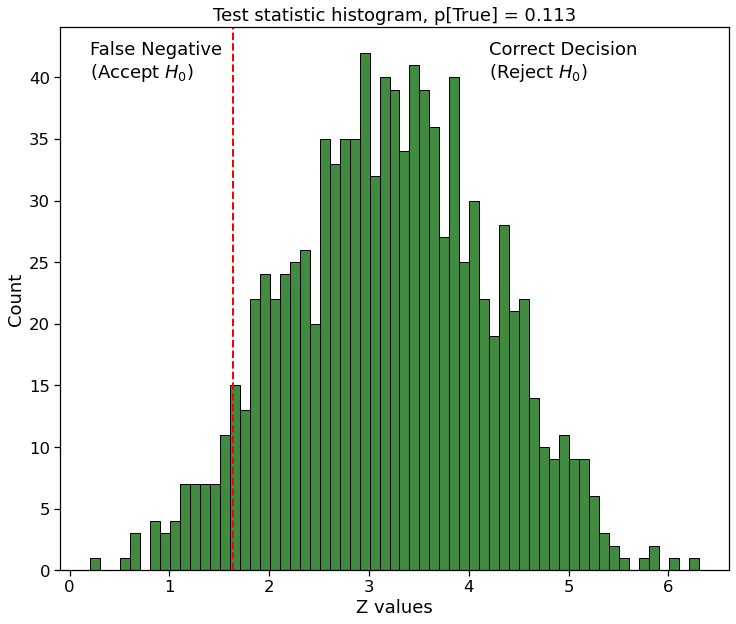

In [23]:
fig = plt.figure(figsize=(12, 10))

sns.histplot(
    data=pd.DataFrame(data=Zvalues, columns=["Z values"]), 
    x="Z values", 
    color="darkgreen",
    binwidth=0.1
)

plt.axvline(Zc, c="red", ls="--", lw=2)
plt.text(0.2, 40, "False Negative\n(Accept $H_0$)")
plt.text(4.2, 40, "Correct Decision\n(Reject $H_0$)")
plt.title(f"Test statistic histogram, p[True] = {p_true}");

Estimate for $p_B$ was too pesimistic, resulting in overly conservative effect size. On the good side, running 1000 identical tests, correct decision will be made in $93.6\%$.